In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
import datetime

dispensaries = pd.read_csv('boston_cannabis_registry.csv')
dispensaries = dispensaries[['Submitted_Date', 'x', 'y']]
dispensaries.dropna(inplace=True)
dispensaries.drop([39, 42], inplace=True)
dispensaries['Submitted_Date'] = pd.to_datetime(dispensaries['Submitted_Date'])
dispensaries.sort_values(by='Submitted_Date')

dispensaries_array = dispensaries.values

dispensaries_18 = []
dispensaries_19 = []

# put into two lists based on year registered
for dispensary in dispensaries_array:
    if (dispensary[0] < datetime.datetime(2019, 1, 1)):
        dispensaries_18.append(dispensary)
    else:
        dispensaries_19.append(dispensary)

# returns list of values that are the elements at the given index of each element in the given dipsensaries
def create_values(dispensaries, index):
    values = []
    
    for dis in dispensaries:
        values.append(dis[index])
    
    return values
    
long_18 = create_values(dispensaries_18, 1)
lat_18 = create_values(dispensaries_18, 2)

long_19 = create_values(dispensaries_19, 1)
lat_19 = create_values(dispensaries_19, 2)

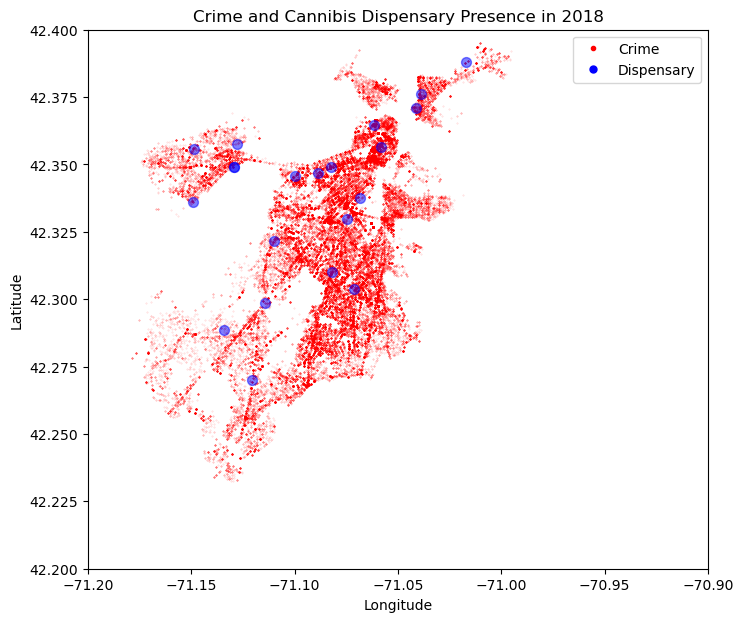

In [4]:
crimes_18 = pd.read_csv('boston_crime_2018.csv')
crimes_18 = crimes_18[['Lat', 'Long']]
crimes_18.dropna(inplace=True)

plt.subplots(figsize = (8,7))
plt.scatter(long_18, lat_18, zorder=2, alpha= 0.5, c='b', s=50)
plt.scatter(crimes_18.Long, crimes_18.Lat, zorder=1, alpha= 0.2, c='r', s=0.1)
plt.xlim(-71.2, -70.9)
plt.ylim(42.2, 42.4)
plt.title('Crime and Cannibis Dispensary Presence in 2018')
plt.xlabel('Longitude') 
plt.ylabel('Latitude') 

# create the legend manually because a singular crime point is too faint and small to show up on automated legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', markersize=3, color='r', linestyle='None', label='Crime'),
    plt.Line2D([0], [0], marker='o', markersize=5, color='b', linestyle='None', label='Dispensary'),
]
plt.legend(handles=legend_elements)

plt.show()

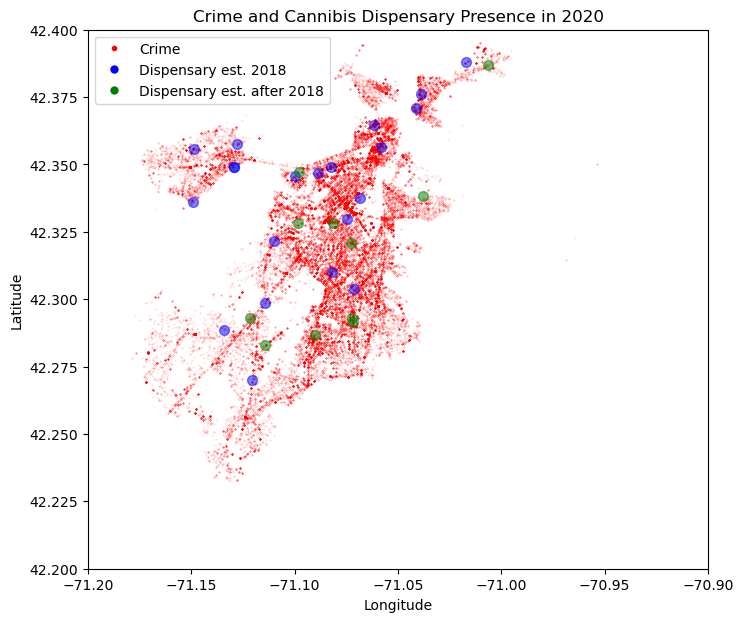

In [5]:
crimes_20 = pd.read_csv('boston_crime_2020.csv', low_memory=False)
crimes_20 = crimes_20[['Lat', 'Long']]

crimes_20.dropna(inplace=True)

plt.subplots(figsize = (8,7))
plt.scatter(long_18, lat_18, zorder=2, alpha= 0.5, c='b', s=50)
plt.scatter(long_19, lat_19, zorder=2, alpha= 0.5, c='g', s=50)
plt.xlim(-71.2, -70.9)
plt.ylim(42.2, 42.4)
plt.title('Crime and Cannibis Dispensary Presence in 2020')
plt.xlabel('Longitude') 
plt.ylabel('Latitude') 
plt.scatter(crimes_20.Long, crimes_20.Lat, zorder=1, alpha= 0.2, c='r', s=0.1)

# create the legend manually because a singular crime point is too faint and small to show up on automated legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', markersize=3, color='r', linestyle='None', label='Crime'),
    plt.Line2D([0], [0], marker='o', markersize=5, color='b', linestyle='None', label='Dispensary est. 2018'),
    plt.Line2D([0], [0], marker='o', markersize=5, color='g', linestyle='None', label='Dispensary est. after 2018')
]
plt.legend(handles=legend_elements)

plt.show()

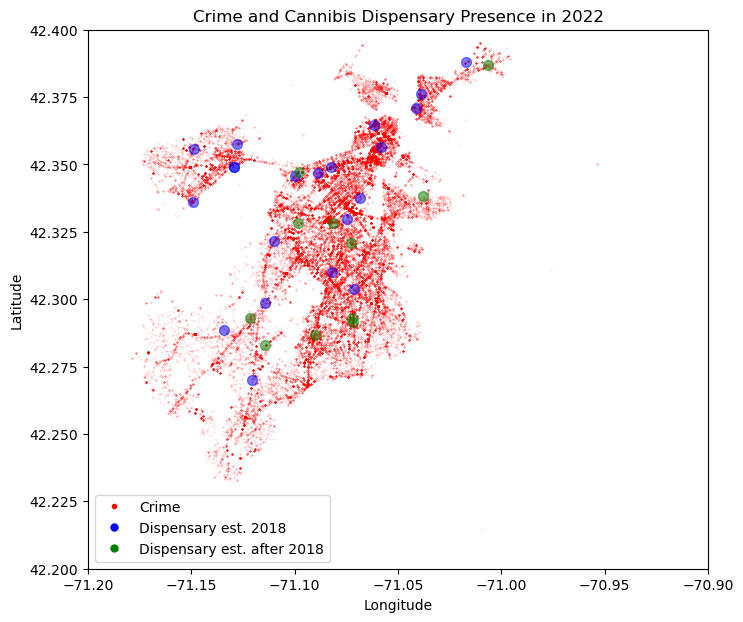

In [6]:
crimes_22 = pd.read_csv('boston_crime_2022.csv', low_memory=False)
crimes_22 = crimes_22[['Lat', 'Long']]

crimes_22.dropna(inplace=True)

plt.subplots(figsize = (8,7))
plt.scatter(long_18, lat_18, zorder=2, alpha= 0.5, c='b', s=50)
plt.scatter(long_19, lat_19, zorder=2, alpha= 0.5, c='g', s=50)
plt.scatter(crimes_22.Long, crimes_22.Lat, zorder=1, alpha= 0.2, c='r', s=0.1)
plt.xlim(-71.2, -70.9)
plt.ylim(42.2, 42.4)
plt.title('Crime and Cannibis Dispensary Presence in 2022')
plt.xlabel('Longitude') 
plt.ylabel('Latitude') 

# create the legend manually because a singular crime point is too faint and small to show up on automated legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', markersize=3, color='r', linestyle='None', label='Crime'),
    plt.Line2D([0], [0], marker='o', markersize=5, color='b', linestyle='None', label='Dispensary est. 2018'),
    plt.Line2D([0], [0], marker='o', markersize=5, color='g', linestyle='None', label='Dispensary est. after 2018')
]
plt.legend(handles=legend_elements)

plt.show()

Based on the three visualizations, it can be seen that the presence of cannibis
dispensaries may not significantly
contribute to an increase in crime rates.
The first plot displays crimes in 2018 and
dispensaries that were registered in 2018,
and it can be seen that areas of dense
crime are not necessarily associated
dispensary presence. Furthermore, in the
second plot, dispensaries that were
registered after 2018 were added as green
dots. It can be seen that the areas of
dense crime in 2020 are not associated
with the presence of the old and new
dispenaries. Even in 2022, there is not a
clear dense occurrence of crime
specifically around the dispensaries.